In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Normal distribution

$$

\begin{align}
\text{Probability density function} &= \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(- \frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right) \\
\text{Cumulative density function} &= \int_{- \infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(- \frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right) dx \\
&= \frac{1}{2} \left(1 + \text{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) \right)
\end{align}

$$

# Inverse of Cumulative density function

$$
\begin{align*}

f(x) &= \frac{1}{2} \left(1 + \text{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) \right) & / \cdot 2 \\
2y &= 1 + \text{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) & / - 1 \\
2y -1 &= \text{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) & / \text{erfinv}() \\
\text{erfinv}(2y - 1) &= \frac{x - \mu}{\sqrt{2} \sigma} & / \cdot \sqrt{2} \sigma \\
\sqrt{2} \sigma \cdot \text{erfinv}(2y - 1) &= x - \mu & / + \mu \\
\sqrt{2} \sigma \cdot \text{erfinv}(2y - 1) + \mu &= x \\
f^{-1}(x) &= \sqrt{2} \sigma \cdot \text{erfinv}(2x - 1) + \mu
\end{align*}
$$

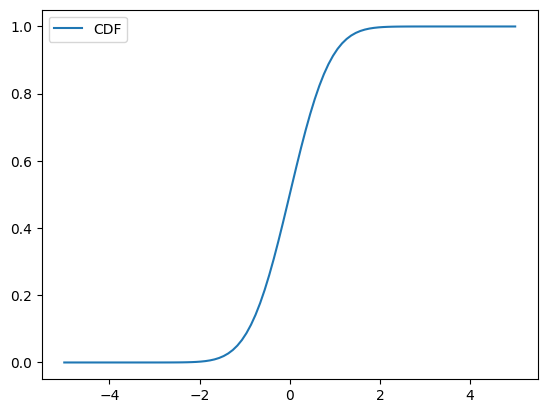

In [40]:
from scipy.special import erf

mu, sigma = 0, 1

x = np.linspace(-5, 5, 100)
y = 0.5 * (1 + erf((x - mu)/sigma))

plt.plot(x, y, label="CDF")
plt.legend()
plt.show()

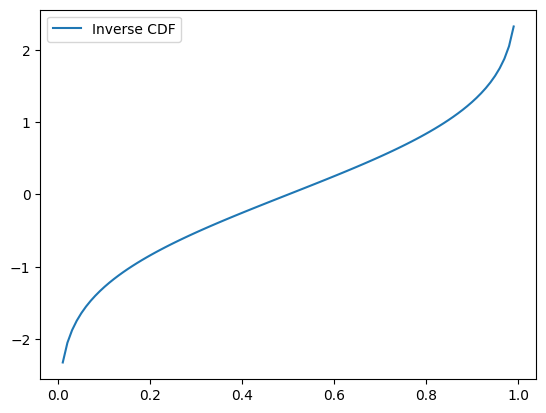

In [41]:
from scipy.special import erfinv

mu, sigma = 0, 1

x = np.linspace(0, 1, 100)
y = np.sqrt(2) * sigma * erfinv(2 * x - 1) + mu

plt.plot(x, y, label="Inverse CDF")
plt.legend()
plt.show()

# Random sample from normal distribution
- generate random uniform number which is the cumulative probability at some $x$ from equation (2)
- using generated random cumulative probability and inverse CDF calculate $x$

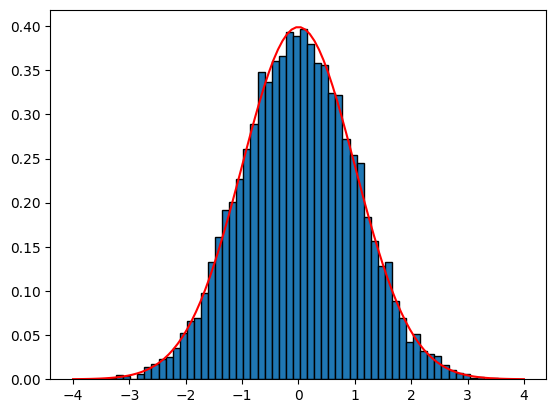

In [61]:
def inverse_cdf(x, mu, sigma):
    return np.sqrt(2) * sigma * erfinv(2 * x - 1) + mu

def generate_random_normal(mu, sigma, n_samples):
    samples = [inverse_cdf(np.random.rand(), mu, sigma) for _ in range(n_samples)]
    return np.array(samples)

def pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

np.random.seed(51)
mu, sigma = 0, 1
data = generate_random_normal(mu, sigma, 10000)

x = np.linspace(-4, 4, 100)
y = pdf(x, mu, sigma)

plt.hist(data, bins='auto', density=True, edgecolor='black')
plt.plot(x, y, color='red')
plt.show()